### 분산 분석 (ANOVA)
- 3개 이상의 집단을 비교할 때 사용하는 것이다.

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 생성
# 비료 A는 평균 10cm, 표준편차는 2, 표본의 개수는 30
# 비료 B는 평균 10cm, 표준편차는 2, 표본의 개수는 30
# 비료 C는 평균 13cm, 표준편차는 2, 표본의 개수는 30
fert_a = np.random.normal(10, 2, 30)
fert_b = np.random.normal(10, 2, 30)
fert_c = np.random.normal(13, 2, 30)

print(f'비료 A 평균 : {np.mean(fert_a)}')
print(f'비료 A 표준편차 : {np.std(fert_a)}')
print(f'비료 A 개수 : {len(fert_a)}')
print("-" * 30)

print(f'비료 B 평균 : {np.mean(fert_b)}')
print(f'비료 B 표준편차 : {np.std(fert_b)}')
print(f'비료 B 개수 : {len(fert_b)}')
print("-" * 30)

print(f'비료 C 평균 : {np.mean(fert_c)}')
print(f'비료 C 표준편차 : {np.std(fert_c)}')
print(f'비료 C 개수 : {len(fert_c)}')

비료 A 평균 : 10.302759563442056
비료 A 표준편차 : 1.8875210141492536
비료 A 개수 : 30
------------------------------
비료 B 평균 : 10.335453042346247
비료 B 표준편차 : 2.1430105386760507
비료 B 개수 : 30
------------------------------
비료 C 평균 : 13.02809206291641
비료 C 표준편차 : 2.0961833973818282
비료 C 개수 : 30


In [3]:
# 통계 검정 수행
# stats.f_oneway(그룹1, 그룹2, 그룹3, 그룹4, ....)
# 귀무가설 : 세 비료의 성장 효과의 평균은 모두 같다(혹은 유의미하게 차이가 나지 않는다) (A=B=C)
# 대립가설 : 적어도 하나 이상의 비료의 성장 효과의 평균은 다르다(혹은 유의미하게 차이가 난다) (다 같은 것은 아니다)
f_stat, p_val = stats.f_oneway(fert_a, fert_b, fert_c)
print(f'p value : {p_val:.4f}')

p value : 0.0000


In [4]:
# 시각화를 위해 데이터 프레임을 생성한다.
df_anova = pd.DataFrame({
    # 성장 데이터 합치기
    'Growth' : np.concatenate([fert_a, fert_b, fert_c]),
    # 그룹
    'Fertilizer' : ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})
df_anova

,Growth,Fertilizer
0,6.948025,A
1,8.366709,A
2,11.033502,A
3,13.356208,A
4,8.737957,A
...,...,...
85,15.389406,C
86,11.524460,C
87,12.560831,C
88,15.307938,C


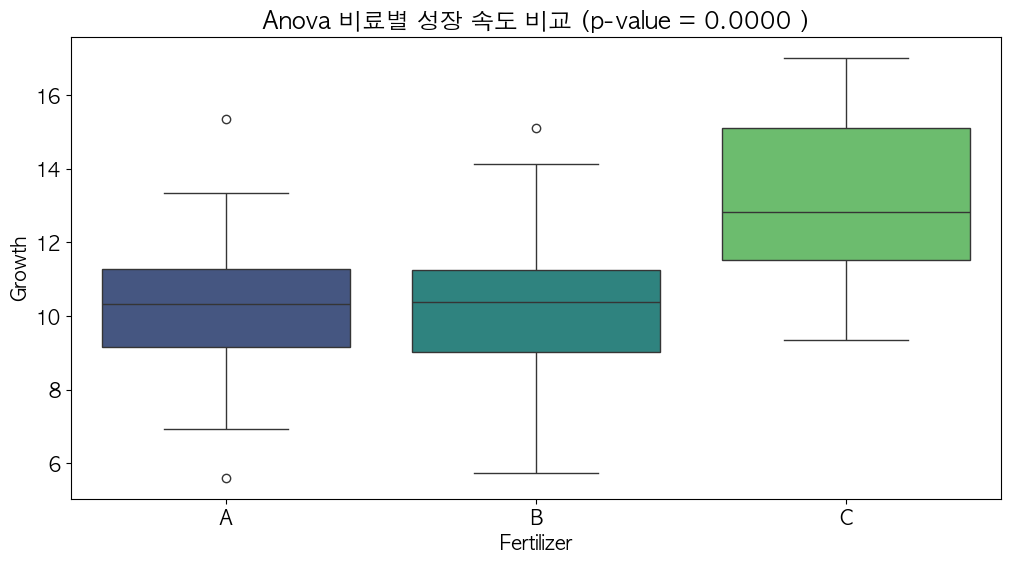

In [5]:
# 박스플롯
sns.boxplot(data=df_anova, x='Fertilizer', y='Growth', palette='viridis', hue='Fertilizer')

plt.title(f'Anova 비료별 성장 속도 비교 (p-value = {p_val:.4f} )')
plt.show()

- ANOVA 검정 결과 p value가 0.05보다 작은 0.001 이므로 "세 비료의 성장 속도 효과의 차이는 유의미하지 않다"라는 귀무가설을 기각한다.
- 따라서 "세 비료 중 적어도 하나 이상의 비료는 다른 비료에 비해 성장 속도 효과에 유의미한 영향을 미친다."
- 시각화를 통해 살펴본 결과 비료 A와 비료B는 비슷하지만 비료 C는 다른 비료에 비해 성장 효과가 크다.